In [1]:
import numpy as np  
import scipy as sc
from statistics import *
from numpy import array
import matplotlib.pyplot as plt

chan1 = []
chan2 = []
chan3 = []
chan4 = []
chan5 = []
chan6 = []
chan7 = []
chan8 = []
chan9 = []
chan10 = []
chan11 = []
nums =[]
with open('channels_meas.txt', 'r') as f:
  for line in f:
    for s in line.split(' '):
      num = float(s)
      nums.append(num)

for i in range(0,len(nums),11):
	chan1.append(nums[i])
	i=i+1
	chan2.append(nums[i])
	i=i+1
	chan3.append(nums[i])
	i=i+1
	chan4.append(nums[i])
	i=i+1
	chan5.append(nums[i])
	i=i+1
	chan6.append(nums[i])
	i=i+1
	chan7.append(nums[i])
	i=i+1
	chan8.append(nums[i])
	i=i+1
	chan9.append(nums[i])
	i=i+1
	chan10.append(nums[i])
	i=i+1
	chan11.append(nums[i])
	i=i+1
print(chan9)
print("Mean: ",mean(chan9))

[2.29, 2.07, 2.79, 2.57, 9.06, 4.14, 6.76, 7.88, 4.11, 6.61, 10.03, 6.66, 11.28, 6.02, 7.94, 9.2, 9.79, 10.62, 5.05, 7.28, 12.86, 6.71, 2.83, 2.64, 6.02, 5.72, 13.73, 4.15, 4.15, 4.12, 4.72, 4.14, 2.34, 3.69, 4.87, 5.3, 3.33, 4.28, 12.08, 6.3, 6.01, 3.28, 4.53, 5.68, 3.03, 5.3, 4.14, 6.65, 6.08, 12.87, 6.03, 9.88, 8.77, 6.73, 6.25, 8.65, 6.2, 6.69, 4.4, 5.46, 6.27, 5.43, 7.69, 10.74, 5.96, 6.54, 5.34, 5.93, 4.34, 6.81, 10.35, 8.33, 12.26, 8.1, 9.14, 7.76, 6.0, 5.64, 10.35, 5.76, 6.72, 5.88, 6.79, 3.33, 5.47, 7.68, 8.29, 8.41, 4.46, 4.08, 8.25, 4.25, 5.55, 10.19, 4.68, 3.59, 2.96, 3.19, 4.1, 5.9]
Mean:  6.3527


(0, 100)

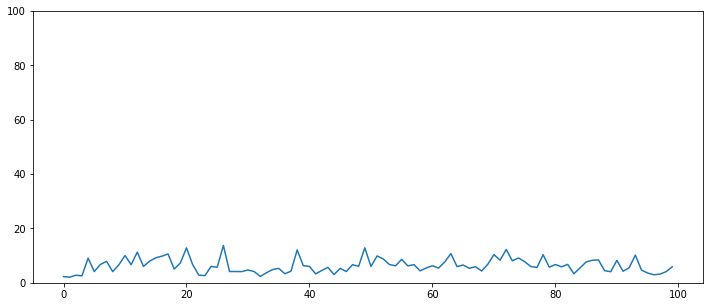

In [2]:
plt.figure(figsize=[12,5])
plt.plot(chan9)
plt.ylim([0,100])

In [3]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = chan9
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

Using TensorFlow backend.


In [4]:
len(X)

97

In [5]:
import math as m
boundary = m.ceil(len(X)*0.8)
print("Boundary: ",boundary)
X_train = X[0:boundary]
X_test = X[boundary:]
print("X_test values\n",X_test)
y_train = y[0:boundary]
y_test = y[boundary:]
print("\ny_test values: \n", y_test)

Boundary:  78
X_test values
 [[[10.35]
  [ 5.76]
  [ 6.72]]

 [[ 5.76]
  [ 6.72]
  [ 5.88]]

 [[ 6.72]
  [ 5.88]
  [ 6.79]]

 [[ 5.88]
  [ 6.79]
  [ 3.33]]

 [[ 6.79]
  [ 3.33]
  [ 5.47]]

 [[ 3.33]
  [ 5.47]
  [ 7.68]]

 [[ 5.47]
  [ 7.68]
  [ 8.29]]

 [[ 7.68]
  [ 8.29]
  [ 8.41]]

 [[ 8.29]
  [ 8.41]
  [ 4.46]]

 [[ 8.41]
  [ 4.46]
  [ 4.08]]

 [[ 4.46]
  [ 4.08]
  [ 8.25]]

 [[ 4.08]
  [ 8.25]
  [ 4.25]]

 [[ 8.25]
  [ 4.25]
  [ 5.55]]

 [[ 4.25]
  [ 5.55]
  [10.19]]

 [[ 5.55]
  [10.19]
  [ 4.68]]

 [[10.19]
  [ 4.68]
  [ 3.59]]

 [[ 4.68]
  [ 3.59]
  [ 2.96]]

 [[ 3.59]
  [ 2.96]
  [ 3.19]]

 [[ 2.96]
  [ 3.19]
  [ 4.1 ]]]

y_test values: 
 [ 5.88  6.79  3.33  5.47  7.68  8.29  8.41  4.46  4.08  8.25  4.25  5.55
 10.19  4.68  3.59  2.96  3.19  4.1   5.9 ]


In [6]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=4000, verbose=1)

Epoch 1/4000
78/78 [==============================] - 1s 12ms/step - loss: 45.8533
Epoch 2/4000
78/78 [==============================] - 0s 269us/step - loss: 44.1278
Epoch 3/4000
78/78 [==============================] - 0s 218us/step - loss: 42.2903
Epoch 4/4000
78/78 [==============================] - 0s 231us/step - loss: 40.3847
Epoch 5/4000
78/78 [==============================] - 0s 218us/step - loss: 38.4458
Epoch 6/4000
78/78 [==============================] - 0s 397us/step - loss: 36.3192
Epoch 7/4000
78/78 [==============================] - 0s 205us/step - loss: 34.0870
Epoch 8/4000
78/78 [==============================] - 0s 243us/step - loss: 31.5854
Epoch 9/4000
78/78 [==============================] - 0s 641us/step - loss: 28.9922
Epoch 10/4000
78/78 [==============================] - 0s 948us/step - loss: 26.1434
Epoch 11/4000
78/78 [==============================] - 0s 256us/step - loss: 23.1311
Epoch 12/4000
78/78 [==============================] - 0s 423us/step - loss

Epoch 98/4000
78/78 [==============================] - 0s 461us/step - loss: 6.3142
Epoch 99/4000
78/78 [==============================] - 0s 256us/step - loss: 6.2622
Epoch 100/4000
78/78 [==============================] - 0s 231us/step - loss: 6.2925
Epoch 101/4000
78/78 [==============================] - 0s 448us/step - loss: 6.2904
Epoch 102/4000
78/78 [==============================] - 0s 346us/step - loss: 6.2569
Epoch 103/4000
78/78 [==============================] - 0s 359us/step - loss: 6.2422
Epoch 104/4000
78/78 [==============================] - 0s 423us/step - loss: 6.2668
Epoch 105/4000
78/78 [==============================] - 0s 372us/step - loss: 6.3430
Epoch 106/4000
78/78 [==============================] - 0s 359us/step - loss: 6.2435
Epoch 107/4000
78/78 [==============================] - 0s 397us/step - loss: 6.1769
Epoch 108/4000
78/78 [==============================] - 0s 295us/step - loss: 6.2985
Epoch 109/4000
78/78 [==============================] - 0s 436us/st

Epoch 289/4000
78/78 [==============================] - 0s 179us/step - loss: 5.8373
Epoch 290/4000
78/78 [==============================] - 0s 192us/step - loss: 5.8313
Epoch 291/4000
78/78 [==============================] - 0s 179us/step - loss: 5.7446
Epoch 292/4000
78/78 [==============================] - 0s 179us/step - loss: 5.8147
Epoch 293/4000
78/78 [==============================] - 0s 256us/step - loss: 5.8066
Epoch 294/4000
78/78 [==============================] - 0s 423us/step - loss: 5.7330
Epoch 295/4000
78/78 [==============================] - 0s 333us/step - loss: 5.7677
Epoch 296/4000
78/78 [==============================] - 0s 154us/step - loss: 5.8283
Epoch 297/4000
78/78 [==============================] - 0s 167us/step - loss: 5.7534
Epoch 298/4000
78/78 [==============================] - 0s 167us/step - loss: 5.7057
Epoch 299/4000
78/78 [==============================] - 0s 218us/step - loss: 5.8834
Epoch 300/4000
78/78 [==============================] - 0s 282us/

78/78 [==============================] - 0s 205us/step - loss: 5.4958
Epoch 386/4000
78/78 [==============================] - 0s 218us/step - loss: 5.5091
Epoch 387/4000
78/78 [==============================] - 0s 269us/step - loss: 5.4667
Epoch 388/4000
78/78 [==============================] - 0s 243us/step - loss: 5.4417
Epoch 389/4000
78/78 [==============================] - 0s 205us/step - loss: 5.4871
Epoch 390/4000
78/78 [==============================] - ETA: 0s - loss: 4.947 - 0s 179us/step - loss: 5.5336
Epoch 391/4000
78/78 [==============================] - 0s 167us/step - loss: 5.4504
Epoch 392/4000
78/78 [==============================] - 0s 179us/step - loss: 5.4579
Epoch 393/4000
78/78 [==============================] - 0s 205us/step - loss: 5.4308
Epoch 394/4000
78/78 [==============================] - 0s 192us/step - loss: 5.4256
Epoch 395/4000
78/78 [==============================] - 0s 179us/step - loss: 5.4338
Epoch 396/4000
78/78 [==============================] - 

Epoch 481/4000
78/78 [==============================] - 0s 192us/step - loss: 5.2725
Epoch 482/4000
78/78 [==============================] - 0s 192us/step - loss: 5.2562
Epoch 483/4000
78/78 [==============================] - 0s 769us/step - loss: 5.2809
Epoch 484/4000
78/78 [==============================] - 0s 179us/step - loss: 5.2468
Epoch 485/4000
78/78 [==============================] - 0s 692us/step - loss: 5.2371
Epoch 486/4000
78/78 [==============================] - 0s 179us/step - loss: 5.3116
Epoch 487/4000
78/78 [==============================] - 0s 179us/step - loss: 5.2197
Epoch 488/4000
78/78 [==============================] - 0s 218us/step - loss: 5.4126
Epoch 489/4000
78/78 [==============================] - 0s 448us/step - loss: 5.3776
Epoch 490/4000
78/78 [==============================] - 0s 167us/step - loss: 5.2508
Epoch 491/4000
78/78 [==============================] - 0s 577us/step - loss: 5.2235
Epoch 492/4000
78/78 [==============================] - 0s 192us/

78/78 [==============================] - 0s 218us/step - loss: 5.0266
Epoch 673/4000
78/78 [==============================] - 0s 269us/step - loss: 5.1254
Epoch 674/4000
78/78 [==============================] - 0s 205us/step - loss: 5.0470
Epoch 675/4000
78/78 [==============================] - 0s 218us/step - loss: 5.0471
Epoch 676/4000
78/78 [==============================] - 0s 359us/step - loss: 5.1288
Epoch 677/4000
78/78 [==============================] - 0s 782us/step - loss: 5.0439
Epoch 678/4000
78/78 [==============================] - 0s 205us/step - loss: 5.1090
Epoch 679/4000
78/78 [==============================] - 0s 192us/step - loss: 5.1163
Epoch 680/4000
78/78 [==============================] - 0s 192us/step - loss: 5.0301
Epoch 681/4000
78/78 [==============================] - 0s 167us/step - loss: 5.1106
Epoch 682/4000
78/78 [==============================] - 0s 256us/step - loss: 5.1332
Epoch 683/4000
78/78 [==============================] - 0s 243us/step - loss: 5.

Epoch 864/4000
78/78 [==============================] - 0s 179us/step - loss: 4.8835
Epoch 865/4000
78/78 [==============================] - 0s 154us/step - loss: 4.9174
Epoch 866/4000
78/78 [==============================] - 0s 602us/step - loss: 4.8955
Epoch 867/4000
78/78 [==============================] - 0s 231us/step - loss: 4.9045
Epoch 868/4000
78/78 [==============================] - 0s 205us/step - loss: 4.9880
Epoch 869/4000
78/78 [==============================] - 0s 205us/step - loss: 4.9197
Epoch 870/4000
78/78 [==============================] - 0s 167us/step - loss: 4.8941
Epoch 871/4000
78/78 [==============================] - 0s 154us/step - loss: 4.9303
Epoch 872/4000
78/78 [==============================] - 0s 564us/step - loss: 4.9062
Epoch 873/4000
78/78 [==============================] - 0s 154us/step - loss: 4.9026
Epoch 874/4000
78/78 [==============================] - 0s 179us/step - loss: 4.8915
Epoch 875/4000
78/78 [==============================] - 0s 192us/

78/78 [==============================] - 0s 205us/step - loss: 4.7506
Epoch 1055/4000
78/78 [==============================] - 0s 308us/step - loss: 4.9077
Epoch 1056/4000
78/78 [==============================] - 0s 282us/step - loss: 4.8489
Epoch 1057/4000
78/78 [==============================] - 0s 192us/step - loss: 4.7376
Epoch 1058/4000
78/78 [==============================] - 0s 474us/step - loss: 4.9632
Epoch 1059/4000
78/78 [==============================] - 0s 308us/step - loss: 4.8624
Epoch 1060/4000
78/78 [==============================] - 0s 564us/step - loss: 4.7600
Epoch 1061/4000
78/78 [==============================] - 0s 167us/step - loss: 4.8259
Epoch 1062/4000
78/78 [==============================] - 0s 179us/step - loss: 4.8363
Epoch 1063/4000
78/78 [==============================] - 0s 179us/step - loss: 4.7740
Epoch 1064/4000
78/78 [==============================] - 0s 179us/step - loss: 4.7399
Epoch 1065/4000
78/78 [==============================] - 0s 179us/step

78/78 [==============================] - 0s 205us/step - loss: 4.6903
Epoch 1244/4000
78/78 [==============================] - 0s 436us/step - loss: 4.6981
Epoch 1245/4000
78/78 [==============================] - 0s 167us/step - loss: 4.6566
Epoch 1246/4000
78/78 [==============================] - 0s 397us/step - loss: 4.6277
Epoch 1247/4000
78/78 [==============================] - 0s 474us/step - loss: 4.6336
Epoch 1248/4000
78/78 [==============================] - 0s 179us/step - loss: 4.6324
Epoch 1249/4000
78/78 [==============================] - 0s 179us/step - loss: 4.6183
Epoch 1250/4000
78/78 [==============================] - 0s 167us/step - loss: 4.6457
Epoch 1251/4000
78/78 [==============================] - 0s 231us/step - loss: 4.6218
Epoch 1252/4000
78/78 [==============================] - 0s 218us/step - loss: 4.6476
Epoch 1253/4000
78/78 [==============================] - 0s 256us/step - loss: 4.6650
Epoch 1254/4000
78/78 [==============================] - 0s 538us/step

Epoch 1433/4000
78/78 [==============================] - 0s 192us/step - loss: 4.5111
Epoch 1434/4000
78/78 [==============================] - 0s 192us/step - loss: 4.4999
Epoch 1435/4000
78/78 [==============================] - 0s 167us/step - loss: 4.4916
Epoch 1436/4000
78/78 [==============================] - 0s 179us/step - loss: 4.5071
Epoch 1437/4000
78/78 [==============================] - 0s 179us/step - loss: 4.5087
Epoch 1438/4000
78/78 [==============================] - 0s 448us/step - loss: 4.4986
Epoch 1439/4000
78/78 [==============================] - 0s 320us/step - loss: 4.4890
Epoch 1440/4000
78/78 [==============================] - 0s 167us/step - loss: 4.5112
Epoch 1441/4000
78/78 [==============================] - 0s 167us/step - loss: 4.5596
Epoch 1442/4000
78/78 [==============================] - 0s 205us/step - loss: 4.4999
Epoch 1443/4000
78/78 [==============================] - 0s 179us/step - loss: 4.4869
Epoch 1444/4000
78/78 [==============================]

Epoch 1528/4000
78/78 [==============================] - 0s 218us/step - loss: 4.4223
Epoch 1529/4000
78/78 [==============================] - 0s 205us/step - loss: 4.4433
Epoch 1530/4000
78/78 [==============================] - 0s 192us/step - loss: 4.4760
Epoch 1531/4000
78/78 [==============================] - 0s 205us/step - loss: 4.4712
Epoch 1532/4000
78/78 [==============================] - 0s 167us/step - loss: 4.4822
Epoch 1533/4000
78/78 [==============================] - 0s 282us/step - loss: 4.4943
Epoch 1534/4000
78/78 [==============================] - 0s 192us/step - loss: 4.4492
Epoch 1535/4000
78/78 [==============================] - ETA: 0s - loss: 3.794 - 0s 205us/step - loss: 4.4413
Epoch 1536/4000
78/78 [==============================] - 0s 179us/step - loss: 4.4491
Epoch 1537/4000
78/78 [==============================] - 0s 179us/step - loss: 4.4648
Epoch 1538/4000
78/78 [==============================] - 0s 192us/step - loss: 4.4097
Epoch 1539/4000
78/78 [=======

78/78 [==============================] - 0s 167us/step - loss: 4.3072
Epoch 1718/4000
78/78 [==============================] - 0s 179us/step - loss: 4.2628
Epoch 1719/4000
78/78 [==============================] - 0s 474us/step - loss: 4.3376
Epoch 1720/4000
78/78 [==============================] - 0s 205us/step - loss: 4.3057
Epoch 1721/4000
78/78 [==============================] - 0s 551us/step - loss: 4.3370
Epoch 1722/4000
78/78 [==============================] - 0s 154us/step - loss: 4.3317
Epoch 1723/4000
78/78 [==============================] - 0s 167us/step - loss: 4.2595
Epoch 1724/4000
78/78 [==============================] - 0s 167us/step - loss: 4.3136
Epoch 1725/4000
78/78 [==============================] - 0s 179us/step - loss: 4.2605
Epoch 1726/4000
78/78 [==============================] - 0s 167us/step - loss: 4.4026
Epoch 1727/4000
78/78 [==============================] - 0s 564us/step - loss: 4.4689
Epoch 1728/4000
78/78 [==============================] - 0s 218us/step

78/78 [==============================] - 0s 423us/step - loss: 4.2008
Epoch 1907/4000
78/78 [==============================] - 0s 167us/step - loss: 4.1293
Epoch 1908/4000
78/78 [==============================] - 0s 320us/step - loss: 4.2030
Epoch 1909/4000
78/78 [==============================] - 0s 923us/step - loss: 4.1532
Epoch 1910/4000
78/78 [==============================] - 0s 154us/step - loss: 4.1349
Epoch 1911/4000
78/78 [==============================] - 0s 218us/step - loss: 4.1606
Epoch 1912/4000
78/78 [==============================] - 0s 192us/step - loss: 4.2505
Epoch 1913/4000
78/78 [==============================] - 0s 205us/step - loss: 4.0977
Epoch 1914/4000
78/78 [==============================] - 0s 167us/step - loss: 4.3530
Epoch 1915/4000
78/78 [==============================] - 0s 243us/step - loss: 4.2378
Epoch 1916/4000
78/78 [==============================] - 0s 974us/step - loss: 4.2063
Epoch 1917/4000
78/78 [==============================] - 0s 218us/step

78/78 [==============================] - 0s 154us/step - loss: 4.0488
Epoch 2002/4000
78/78 [==============================] - 0s 205us/step - loss: 4.1039
Epoch 2003/4000
78/78 [==============================] - 0s 205us/step - loss: 4.0779
Epoch 2004/4000
78/78 [==============================] - 0s 308us/step - loss: 4.0194
Epoch 2005/4000
78/78 [==============================] - 0s 423us/step - loss: 4.0541
Epoch 2006/4000
78/78 [==============================] - 0s 192us/step - loss: 4.0392
Epoch 2007/4000
78/78 [==============================] - 0s 154us/step - loss: 4.0512
Epoch 2008/4000
78/78 [==============================] - 0s 154us/step - loss: 4.0533
Epoch 2009/4000
78/78 [==============================] - 0s 167us/step - loss: 4.0599
Epoch 2010/4000
78/78 [==============================] - 0s 320us/step - loss: 4.0090
Epoch 2011/4000
78/78 [==============================] - 0s 730us/step - loss: 4.0129
Epoch 2012/4000
78/78 [==============================] - 0s 179us/step

78/78 [==============================] - 0s 410us/step - loss: 3.8104
Epoch 2191/4000
78/78 [==============================] - 0s 154us/step - loss: 3.6899
Epoch 2192/4000
78/78 [==============================] - 0s 167us/step - loss: 3.7843
Epoch 2193/4000
78/78 [==============================] - 0s 474us/step - loss: 3.6997
Epoch 2194/4000
78/78 [==============================] - 0s 179us/step - loss: 3.7848
Epoch 2195/4000
78/78 [==============================] - 0s 167us/step - loss: 3.7129
Epoch 2196/4000
78/78 [==============================] - 0s 167us/step - loss: 3.7593
Epoch 2197/4000
78/78 [==============================] - 0s 154us/step - loss: 3.7242
Epoch 2198/4000
78/78 [==============================] - 0s 154us/step - loss: 3.6918
Epoch 2199/4000
78/78 [==============================] - 0s 538us/step - loss: 3.6755
Epoch 2200/4000
78/78 [==============================] - 0s 167us/step - loss: 3.7201
Epoch 2201/4000
78/78 [==============================] - 0s 167us/step

78/78 [==============================] - 0s 179us/step - loss: 3.4829
Epoch 2380/4000
78/78 [==============================] - 0s 384us/step - loss: 3.3993
Epoch 2381/4000
78/78 [==============================] - 0s 372us/step - loss: 3.4015
Epoch 2382/4000
78/78 [==============================] - 0s 205us/step - loss: 3.3676
Epoch 2383/4000
78/78 [==============================] - 0s 192us/step - loss: 3.5140
Epoch 2384/4000
78/78 [==============================] - 0s 192us/step - loss: 3.3707
Epoch 2385/4000
78/78 [==============================] - 0s 333us/step - loss: 3.3330
Epoch 2386/4000
78/78 [==============================] - 0s 192us/step - loss: 3.4007
Epoch 2387/4000
78/78 [==============================] - 0s 538us/step - loss: 3.3946
Epoch 2388/4000
78/78 [==============================] - 0s 308us/step - loss: 3.3685
Epoch 2389/4000
78/78 [==============================] - 0s 167us/step - loss: 3.3986
Epoch 2390/4000
78/78 [==============================] - 0s 243us/step

78/78 [==============================] - 0s 179us/step - loss: 3.2868
Epoch 2475/4000
78/78 [==============================] - 0s 513us/step - loss: 3.3010
Epoch 2476/4000
78/78 [==============================] - 0s 192us/step - loss: 3.4462
Epoch 2477/4000
78/78 [==============================] - 0s 192us/step - loss: 3.4510
Epoch 2478/4000
78/78 [==============================] - 0s 154us/step - loss: 3.2979
Epoch 2479/4000
78/78 [==============================] - 0s 179us/step - loss: 3.3299
Epoch 2480/4000
78/78 [==============================] - 0s 231us/step - loss: 3.1838
Epoch 2481/4000
78/78 [==============================] - 0s 513us/step - loss: 3.3862
Epoch 2482/4000
78/78 [==============================] - 0s 167us/step - loss: 3.4329
Epoch 2483/4000
78/78 [==============================] - 0s 218us/step - loss: 3.3879
Epoch 2484/4000
78/78 [==============================] - 0s 192us/step - loss: 3.2798
Epoch 2485/4000
78/78 [==============================] - 0s 167us/step

78/78 [==============================] - 0s 179us/step - loss: 3.1212
Epoch 2570/4000
78/78 [==============================] - 0s 653us/step - loss: 3.1299
Epoch 2571/4000
78/78 [==============================] - 0s 179us/step - loss: 3.0967
Epoch 2572/4000
78/78 [==============================] - 0s 218us/step - loss: 3.0754
Epoch 2573/4000
78/78 [==============================] - 0s 205us/step - loss: 3.1417
Epoch 2574/4000
78/78 [==============================] - 0s 192us/step - loss: 3.1631
Epoch 2575/4000
78/78 [==============================] - 0s 167us/step - loss: 3.0581
Epoch 2576/4000
78/78 [==============================] - 0s 448us/step - loss: 3.1489
Epoch 2577/4000
78/78 [==============================] - 0s 167us/step - loss: 3.0620
Epoch 2578/4000
78/78 [==============================] - 0s 192us/step - loss: 3.2258
Epoch 2579/4000
78/78 [==============================] - 0s 179us/step - loss: 3.2088
Epoch 2580/4000
78/78 [==============================] - 0s 179us/step

78/78 [==============================] - 0s 167us/step - loss: 2.9044
Epoch 2759/4000
78/78 [==============================] - 0s 705us/step - loss: 2.9082
Epoch 2760/4000
78/78 [==============================] - 0s 192us/step - loss: 2.8605
Epoch 2761/4000
78/78 [==============================] - 0s 205us/step - loss: 2.8300
Epoch 2762/4000
78/78 [==============================] - 0s 192us/step - loss: 2.8521
Epoch 2763/4000
78/78 [==============================] - 0s 192us/step - loss: 2.9366
Epoch 2764/4000
78/78 [==============================] - 0s 167us/step - loss: 2.8386
Epoch 2765/4000
78/78 [==============================] - 0s 372us/step - loss: 2.8712
Epoch 2766/4000
78/78 [==============================] - 0s 346us/step - loss: 2.8184
Epoch 2767/4000
78/78 [==============================] - 0s 192us/step - loss: 2.9168
Epoch 2768/4000
78/78 [==============================] - 0s 192us/step - loss: 2.8434
Epoch 2769/4000
78/78 [==============================] - 0s 179us/step

78/78 [==============================] - 0s 179us/step - loss: 2.6570
Epoch 2949/4000
78/78 [==============================] - 0s 167us/step - loss: 2.7255
Epoch 2950/4000
78/78 [==============================] - 0s 154us/step - loss: 2.6573
Epoch 2951/4000
78/78 [==============================] - ETA: 0s - loss: 3.233 - 0s 154us/step - loss: 2.6540
Epoch 2952/4000
78/78 [==============================] - 0s 218us/step - loss: 2.6716
Epoch 2953/4000
78/78 [==============================] - 0s 205us/step - loss: 2.6376
Epoch 2954/4000
78/78 [==============================] - 0s 179us/step - loss: 2.6347
Epoch 2955/4000
78/78 [==============================] - 0s 192us/step - loss: 2.6919
Epoch 2956/4000
78/78 [==============================] - 0s 243us/step - loss: 2.6332
Epoch 2957/4000
78/78 [==============================] - 0s 179us/step - loss: 2.5965
Epoch 2958/4000
78/78 [==============================] - 0s 205us/step - loss: 2.7307
Epoch 2959/4000
78/78 [=======================

78/78 [==============================] - 0s 218us/step - loss: 2.5819
Epoch 3044/4000
78/78 [==============================] - 0s 167us/step - loss: 2.5641
Epoch 3045/4000
78/78 [==============================] - 0s 192us/step - loss: 2.5051
Epoch 3046/4000
78/78 [==============================] - 0s 192us/step - loss: 2.5314
Epoch 3047/4000
78/78 [==============================] - 0s 167us/step - loss: 2.5155
Epoch 3048/4000
78/78 [==============================] - 0s 167us/step - loss: 2.5246
Epoch 3049/4000
78/78 [==============================] - 0s 179us/step - loss: 2.5023
Epoch 3050/4000
78/78 [==============================] - 0s 192us/step - loss: 2.5137
Epoch 3051/4000
78/78 [==============================] - 0s 205us/step - loss: 2.4932
Epoch 3052/4000
78/78 [==============================] - 0s 192us/step - loss: 2.4879
Epoch 3053/4000
78/78 [==============================] - 0s 218us/step - loss: 2.5382
Epoch 3054/4000
78/78 [==============================] - 0s 192us/step

78/78 [==============================] - 0s 179us/step - loss: 2.3169
Epoch 3232/4000
78/78 [==============================] - 0s 167us/step - loss: 2.3928
Epoch 3233/4000
78/78 [==============================] - 0s 205us/step - loss: 2.2852
Epoch 3234/4000
78/78 [==============================] - 0s 205us/step - loss: 2.4151
Epoch 3235/4000
78/78 [==============================] - 0s 179us/step - loss: 2.2939
Epoch 3236/4000
78/78 [==============================] - 0s 205us/step - loss: 2.5051
Epoch 3237/4000
78/78 [==============================] - 0s 192us/step - loss: 2.3228
Epoch 3238/4000
78/78 [==============================] - 0s 205us/step - loss: 2.3246
Epoch 3239/4000
78/78 [==============================] - 0s 192us/step - loss: 2.3774
Epoch 3240/4000
78/78 [==============================] - 0s 192us/step - loss: 2.2986
Epoch 3241/4000
78/78 [==============================] - 0s 205us/step - loss: 2.2295
Epoch 3242/4000
78/78 [==============================] - 0s 231us/step

78/78 [==============================] - 0s 205us/step - loss: 2.0397
Epoch 3422/4000
78/78 [==============================] - 0s 231us/step - loss: 2.0089
Epoch 3423/4000
78/78 [==============================] - 0s 282us/step - loss: 2.0625
Epoch 3424/4000
78/78 [==============================] - 0s 218us/step - loss: 1.9853
Epoch 3425/4000
78/78 [==============================] - 0s 359us/step - loss: 1.9793
Epoch 3426/4000
78/78 [==============================] - 0s 256us/step - loss: 2.1016
Epoch 3427/4000
78/78 [==============================] - 0s 231us/step - loss: 1.9768
Epoch 3428/4000
78/78 [==============================] - 0s 243us/step - loss: 1.9984
Epoch 3429/4000
78/78 [==============================] - 0s 179us/step - loss: 2.0401
Epoch 3430/4000
78/78 [==============================] - 0s 218us/step - loss: 2.0069
Epoch 3431/4000
78/78 [==============================] - 0s 205us/step - loss: 2.0119
Epoch 3432/4000
78/78 [==============================] - 0s 192us/step

78/78 [==============================] - 0s 205us/step - loss: 1.8140
Epoch 3611/4000
78/78 [==============================] - 0s 256us/step - loss: 1.7620
Epoch 3612/4000
78/78 [==============================] - 0s 231us/step - loss: 1.7520
Epoch 3613/4000
78/78 [==============================] - 0s 179us/step - loss: 1.7666
Epoch 3614/4000
78/78 [==============================] - 0s 179us/step - loss: 1.8281
Epoch 3615/4000
78/78 [==============================] - 0s 295us/step - loss: 1.8350
Epoch 3616/4000
78/78 [==============================] - 0s 231us/step - loss: 1.8653
Epoch 3617/4000
78/78 [==============================] - 0s 154us/step - loss: 1.8782
Epoch 3618/4000
78/78 [==============================] - 0s 167us/step - loss: 1.7538
Epoch 3619/4000
78/78 [==============================] - 0s 192us/step - loss: 1.8265
Epoch 3620/4000
78/78 [==============================] - 0s 205us/step - loss: 1.8958
Epoch 3621/4000
78/78 [==============================] - 0s 167us/step

78/78 [==============================] - 0s 179us/step - loss: 1.6776
Epoch 3706/4000
78/78 [==============================] - 0s 167us/step - loss: 1.6730
Epoch 3707/4000
78/78 [==============================] - 0s 167us/step - loss: 1.6617
Epoch 3708/4000
78/78 [==============================] - 0s 231us/step - loss: 1.7609
Epoch 3709/4000
78/78 [==============================] - 0s 269us/step - loss: 1.5797
Epoch 3710/4000
78/78 [==============================] - 0s 692us/step - loss: 1.7052
Epoch 3711/4000
78/78 [==============================] - 0s 179us/step - loss: 1.6757
Epoch 3712/4000
78/78 [==============================] - 0s 179us/step - loss: 1.7099
Epoch 3713/4000
78/78 [==============================] - 0s 218us/step - loss: 1.6831
Epoch 3714/4000
78/78 [==============================] - 0s 179us/step - loss: 1.6704
Epoch 3715/4000
78/78 [==============================] - 0s 167us/step - loss: 1.6497
Epoch 3716/4000
78/78 [==============================] - 0s 1ms/step -

78/78 [==============================] - 0s 564us/step - loss: 1.3995
Epoch 3896/4000
78/78 [==============================] - 0s 218us/step - loss: 1.3511
Epoch 3897/4000
78/78 [==============================] - 0s 487us/step - loss: 1.3736
Epoch 3898/4000
78/78 [==============================] - 0s 192us/step - loss: 1.3654
Epoch 3899/4000
78/78 [==============================] - 0s 179us/step - loss: 1.4041
Epoch 3900/4000
78/78 [==============================] - 0s 167us/step - loss: 1.4061
Epoch 3901/4000
78/78 [==============================] - 0s 461us/step - loss: 1.4051
Epoch 3902/4000
78/78 [==============================] - 0s 167us/step - loss: 1.3556
Epoch 3903/4000
78/78 [==============================] - 0s 167us/step - loss: 1.4784
Epoch 3904/4000
78/78 [==============================] - 0s 231us/step - loss: 1.4481
Epoch 3905/4000
78/78 [==============================] - 0s 256us/step - loss: 1.4206
Epoch 3906/4000
78/78 [==============================] - 0s 205us/step

78/78 [==============================] - 0s 167us/step - loss: 1.2691
Epoch 3991/4000
78/78 [==============================] - 0s 154us/step - loss: 1.4398
Epoch 3992/4000
78/78 [==============================] - 0s 256us/step - loss: 1.3420
Epoch 3993/4000
78/78 [==============================] - 0s 410us/step - loss: 1.3149
Epoch 3994/4000
78/78 [==============================] - 0s 218us/step - loss: 1.3336
Epoch 3995/4000
78/78 [==============================] - 0s 192us/step - loss: 1.2872
Epoch 3996/4000
78/78 [==============================] - 0s 192us/step - loss: 1.2521
Epoch 3997/4000
78/78 [==============================] - 0s 282us/step - loss: 1.2874
Epoch 3998/4000
78/78 [==============================] - 0s 179us/step - loss: 1.3069
Epoch 3999/4000
78/78 [==============================] - 0s 256us/step - loss: 1.3202
Epoch 4000/4000
78/78 [==============================] - 0s 192us/step - loss: 1.3029


In [12]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

**RMSE**

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. 

In [8]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print("Training RMSE: ", round(rmse(y_train,train_predictions),2))
print("Testing RMSE: ", round(rmse(y_test,test_predictions),2))

Training RMSE:  3.44
Testing RMSE:  3.36


Text(85, 1, 'Testing')

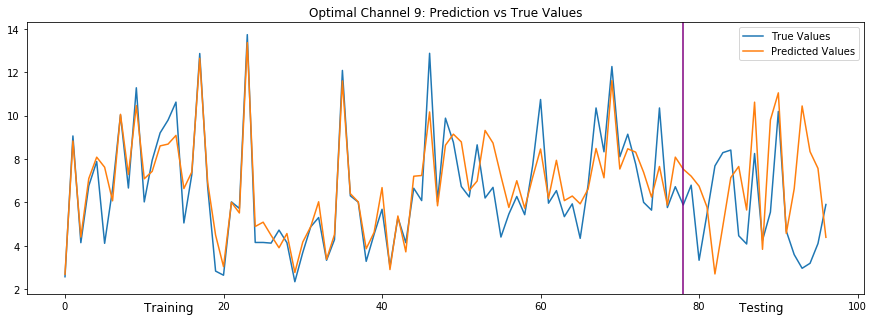

In [9]:
plt.figure(figsize=(15,5))
plt.plot(np.append(y_train,y_test))
plt.plot(np.append(train_predictions,test_predictions))
plt.legend( ('True Values', 'Predicted Values'))
plt.title('Optimal Channel 9: Prediction vs True Values')
plt.axvline(x=boundary,color="purple")
plt.text(10, 1, "Training", fontsize=12)
plt.text(85, 1, "Testing", fontsize=12)

In [10]:
print("Channel 9")
print("Predicted Mean Value of Testing: ",round(mean(np.array(test_predictions).reshape(-1)),2))
print("Real Mean Value of Testing: ",round(mean(y[boundary:]),2))

Channel 9
Predicted Mean Value of Testing:  6.98
Real Mean Value of Testing:  5.63


# All Channels

In [11]:
channels = [chan1 , chan2, chan3, chan4, chan5, chan6, chan7, chan8, chan9, chan10, chan11]
all_train_predictions = [0,0,0,0,0,0,0,0,0,0,0]
all_test_predictions = [0,0,0,0,0,0,0,0,0,0,0]
all_pred_mean = [0,0,0,0,0,0,0,0,0,0,0]
all_real_mean = [0,0,0,0,0,0,0,0,0,0,0]
all_y_test = [0,0,0,0,0,0,0,0,0,0,0]
all_y_train = [0,0,0,0,0,0,0,0,0,0,0]

for i in range(0,11):
    # define input sequence
    raw_seq = channels[i]
    # choose a number of time steps
    n_steps = 3
    # split into samples
    X, y = split_sequence(raw_seq, n_steps)
    # reshape from [samples, timesteps] into [samples, timesteps, features]
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # Train-Test Split
    boundary = m.ceil(len(X)*0.8)
    X_train = X[0:boundary]
    X_test = X[boundary:]
    y_train = y[0:boundary]
    y_test = y[boundary:]

    # define model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    # fit model
    model.fit(X_train, y_train, epochs=4000, verbose=0)

    # predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    # mean test(future) predictions
    pred_mean = round(mean(np.array(test_predictions).reshape(-1)),2)
    real_mean = round(mean(y[boundary:]),2)
    print("Channel "+str(i+1))
    print("Predicted Mean Value of Testing: ",pred_mean)
    print("Real Mean Value of Testing: ",real_mean)
    
    all_y_test[i] = y_test
    all_y_train[i] = y_train
    all_train_predictions[i] = train_predictions
    all_test_predictions[i] = test_predictions
    all_pred_mean[i] = pred_mean
    all_real_mean[i] = real_mean

Channel 1
Predicted Mean Value of Testing:  29.69
Real Mean Value of Testing:  32.69
Channel 2
Predicted Mean Value of Testing:  27.86
Real Mean Value of Testing:  29.85
Channel 3
Predicted Mean Value of Testing:  26.82
Real Mean Value of Testing:  27.48
Channel 4
Predicted Mean Value of Testing:  23.8
Real Mean Value of Testing:  22.55
Channel 5
Predicted Mean Value of Testing:  24.86
Real Mean Value of Testing:  22.78
Channel 6
Predicted Mean Value of Testing:  18.14
Real Mean Value of Testing:  20.49
Channel 7
Predicted Mean Value of Testing:  14.8
Real Mean Value of Testing:  15.48
Channel 8
Predicted Mean Value of Testing:  10.89
Real Mean Value of Testing:  9.32
Channel 9
Predicted Mean Value of Testing:  6.93
Real Mean Value of Testing:  5.63
Channel 10
Predicted Mean Value of Testing:  7.74
Real Mean Value of Testing:  6.93
Channel 11
Predicted Mean Value of Testing:  15.42
Real Mean Value of Testing:  16.43


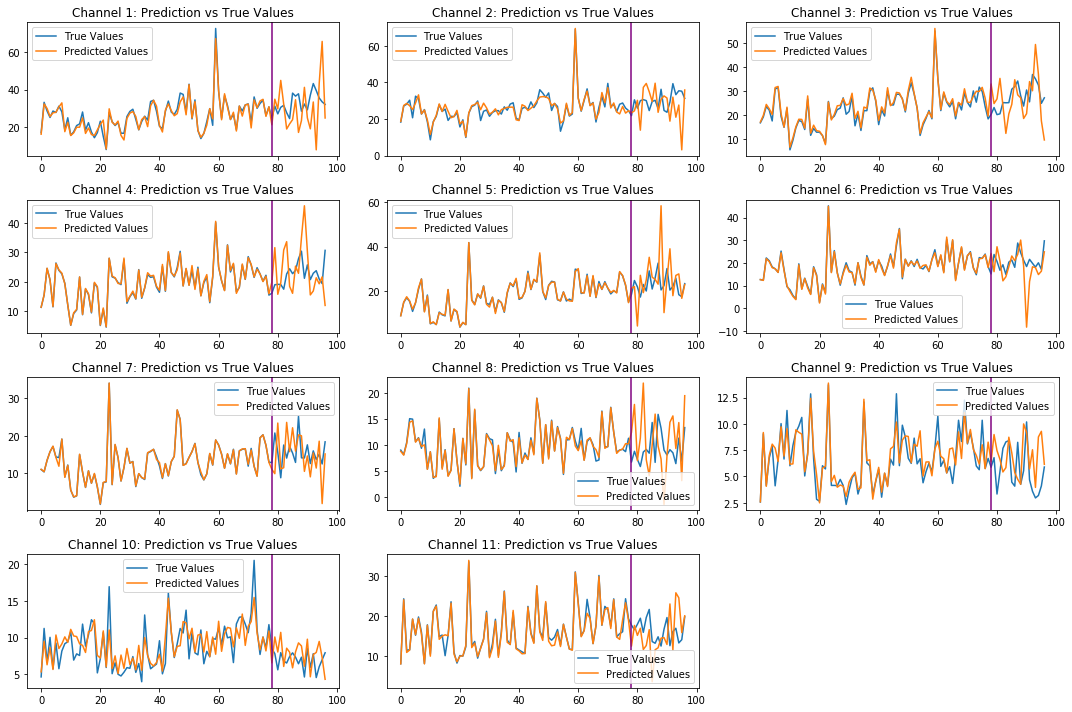

In [24]:
plt.figure(figsize=(15,10))
for j in range(11):
    plt.subplot(4, 3, j+1)
    print()
    plt.plot(np.append(all_y_train[j],all_y_test[j]))
    plt.plot(np.append(all_train_predictions[j],all_test_predictions[j]))
    plt.legend( ('True Values', 'Predicted Values'))
    plt.title('Channel '+str(j+1)+': Prediction vs True Values')
    plt.axvline(x=boundary,color="purple")
    plt.tight_layout()

Text(0, 0.5, 'Busy Percentage %')

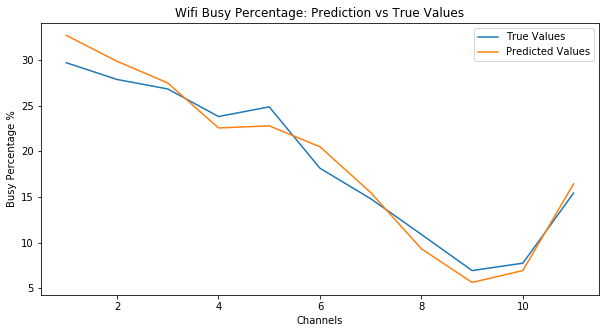

In [25]:
x = [1,2,3,4,5,6,7,8,9,10,11]
plt.figure(figsize=(10,5))
plt.plot(x,all_pred_mean)
plt.plot(x,all_real_mean)
plt.legend( ('True Values', 'Predicted Values'))
plt.title('Wifi Busy Percentage: Prediction vs True Values')
plt.xlabel("Channels")
plt.ylabel("Busy Percentage %")

In [26]:
for i in range(11):
    if all_pred_mean[i] == min(all_pred_mean):
        pred_optimal_channel = i+1
        break
for i in range(11):
    if all_real_mean[i] == min(all_real_mean):
        real_optimal_channel = i+1
        break

# Recommended Channel

In [27]:
print("Predicted Optimal Channel: ",pred_optimal_channel,"  (Busy Percentage:",all_pred_mean[pred_optimal_channel-1],"% )")
print("Real Optimal Channel: ",real_optimal_channel,"  (Busy Percentage:",all_real_mean[real_optimal_channel-1],"% )")

Predicted Optimal Channel:  9   (Busy Percentage: 6.93 % )
Real Optimal Channel:  9   (Busy Percentage: 5.63 % )
